In [1]:
import requests
from dotenv import load_dotenv
import os 
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
# from MCForecastTools import MCSimulation
import json
import matplotlib.pyplot as plt

load_dotenv()

True

In [2]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version= "v2")


In [3]:
current_date = pd.Timestamp("2020-01-05", tz="America/New_York").isoformat()

tickers = ["SPY", "AAPL", "TSLA", "AMZN", "DIS", "FB", "GOOGL", "GE", "NIO", "F", "MSFT"]


timeframe = "1D"

In [4]:
def get_data(ticker):
    df = alpaca.get_barset(
        ticker,
        timeframe,
        start = current_date
    ).df

    return df


In [5]:
def get_columns(dataframe):
    dataframe = dataframe.T.reset_index(drop = True).T
    dataframe = dataframe.rename(columns={3:"close"})
    dataframe = dataframe.loc[:,["close"]]

    return dataframe

In [6]:
def calc_data(dataframe):
    dataframe["pct_change"] = dataframe["close"].pct_change()
    dataframe["volatility"] = np.std(dataframe["pct_change"])

    return dataframe


In [7]:
df_spy = get_data("SPY")
df_spy = get_columns(df_spy)
df_spy = calc_data(df_spy)
df_spy.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,323.67,NaN,0.021306
2020-01-07 00:00:00-05:00,322.76,-0.002812,0.021306
2020-01-08 00:00:00-05:00,324.42,0.005143,0.021306
2020-01-09 00:00:00-05:00,326.62,0.006781,0.021306
2020-01-10 00:00:00-05:00,325.70,-0.002817,0.021306


<AxesSubplot:xlabel='time'>

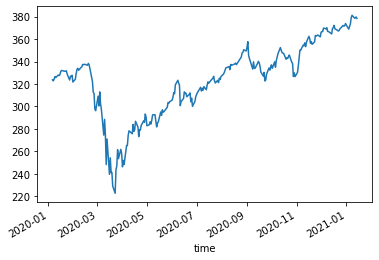

In [8]:
df_spy.close.plot()

In [9]:
df_aapl = get_data("AAPL")
df_aapl = get_columns(df_aapl)
df_aapl = calc_data(df_aapl)
df_aapl.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,299.78,NaN,0.054645
2020-01-07 00:00:00-05:00,298.27,-0.005037,0.054645
2020-01-08 00:00:00-05:00,303.15,0.016361,0.054645
2020-01-09 00:00:00-05:00,309.71,0.021639,0.054645
2020-01-10 00:00:00-05:00,310.37,0.002131,0.054645


In [10]:
df_aapl_1 = df_aapl.loc[:"20200828"]
df_aapl_1["close"] = (df_aapl_1["close"]/2)
df_aapl_1.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,149.890,NaN,0.054645
2020-01-07 00:00:00-05:00,149.135,-0.005037,0.054645
2020-01-08 00:00:00-05:00,151.575,0.016361,0.054645
2020-01-09 00:00:00-05:00,154.855,0.021639,0.054645
2020-01-10 00:00:00-05:00,155.185,0.002131,0.054645


In [11]:
df_apple_2 = df_aapl.loc["20200829":]
df_apple_2.head()

,close,pct_change,volatility
time,,,
2020-08-31 00:00:00-04:00,128.85,-0.741696,0.054645
2020-09-01 00:00:00-04:00,134.20,0.041521,0.054645
2020-09-02 00:00:00-04:00,131.22,-0.022206,0.054645
2020-09-03 00:00:00-04:00,120.92,-0.078494,0.054645
2020-09-04 00:00:00-04:00,120.90,-0.000165,0.054645


In [12]:
df_aapl = pd.concat([df_aapl_1, df_apple_2])
df_aapl

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,149.8900,NaN,0.054645
2020-01-07 00:00:00-05:00,149.1350,-0.005037,0.054645
2020-01-08 00:00:00-05:00,151.5750,0.016361,0.054645
2020-01-09 00:00:00-05:00,154.8550,0.021639,0.054645
2020-01-10 00:00:00-05:00,155.1850,0.002131,0.054645
...,...,...,...
2021-01-08 00:00:00-05:00,131.9900,0.008712,0.054645
2021-01-11 00:00:00-05:00,128.9800,-0.022805,0.054645
2021-01-12 00:00:00-05:00,128.8199,-0.001241,0.054645


In [13]:
df_tsla = get_data("TSLA")
df_tsla = get_columns(df_tsla)
df_tsla = calc_data(df_tsla)
df_tsla.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,451.4001,NaN,0.073801
2020-01-07 00:00:00-05:00,469.1700,0.039366,0.073801
2020-01-08 00:00:00-05:00,492.0900,0.048852,0.073801
2020-01-09 00:00:00-05:00,481.4900,-0.021541,0.073801
2020-01-10 00:00:00-05:00,477.9600,-0.007331,0.073801


In [14]:
df_tsla_1 = df_tsla.loc[:"20200828"]
df_tsla_1["close"] = (df_tsla_1["close"]/5)
df_tsla_1.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,90.28002,NaN,0.073801
2020-01-07 00:00:00-05:00,93.83400,0.039366,0.073801
2020-01-08 00:00:00-05:00,98.41800,0.048852,0.073801
2020-01-09 00:00:00-05:00,96.29800,-0.021541,0.073801
2020-01-10 00:00:00-05:00,95.59200,-0.007331,0.073801


In [15]:
df_tsla_2 = df_tsla.loc["20200829":]
df_tsla_2.head()

,close,pct_change,volatility
time,,,
2020-08-31 00:00:00-04:00,498.5100,-0.774789,0.073801
2020-09-01 00:00:00-04:00,475.0400,-0.047080,0.073801
2020-09-02 00:00:00-04:00,447.2450,-0.058511,0.073801
2020-09-03 00:00:00-04:00,407.0000,-0.089984,0.073801
2020-09-04 00:00:00-04:00,417.9307,0.026857,0.073801


In [16]:
df_tsla = pd.concat([df_tsla_1, df_tsla_2])
df_tsla

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,90.28002,NaN,0.073801
2020-01-07 00:00:00-05:00,93.83400,0.039366,0.073801
2020-01-08 00:00:00-05:00,98.41800,0.048852,0.073801
2020-01-09 00:00:00-05:00,96.29800,-0.021541,0.073801
2020-01-10 00:00:00-05:00,95.59200,-0.007331,0.073801
...,...,...,...
2021-01-08 00:00:00-05:00,880.03000,0.078151,0.073801
2021-01-11 00:00:00-05:00,811.18000,-0.078236,0.073801
2021-01-12 00:00:00-05:00,849.22000,0.046895,0.073801


In [17]:
df_dis = get_data("DIS")
df_dis = get_columns(df_dis)
df_dis = calc_data(df_dis)
df_dis.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,145.65,NaN,0.030456
2020-01-07 00:00:00-05:00,145.68,0.000206,0.030456
2020-01-08 00:00:00-05:00,145.45,-0.001579,0.030456
2020-01-09 00:00:00-05:00,144.80,-0.004469,0.030456
2020-01-10 00:00:00-05:00,144.60,-0.001381,0.030456


In [18]:
df_fb = get_data("FB")
df_fb = get_columns(df_fb)
df_fb = calc_data(df_fb)
df_fb.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,212.5855,NaN,0.028952
2020-01-07 00:00:00-05:00,213.0500,0.002185,0.028952
2020-01-08 00:00:00-05:00,215.3000,0.010561,0.028952
2020-01-09 00:00:00-05:00,218.3100,0.013980,0.028952
2020-01-10 00:00:00-05:00,218.0700,-0.001099,0.028952


In [19]:
df_googl = get_data("GOOGL")
df_googl = get_columns(df_googl)
df_googl = calc_data(df_googl)
df_googl.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,1397.43,NaN,0.024141
2020-01-07 00:00:00-05:00,1395.55,-0.001345,0.024141
2020-01-08 00:00:00-05:00,1405.48,0.007115,0.024141
2020-01-09 00:00:00-05:00,1420.15,0.010438,0.024141
2020-01-10 00:00:00-05:00,1429.37,0.006492,0.024141


In [20]:
df_ge = get_data("GE")
df_ge = get_columns(df_ge)
df_ge = calc_data(df_ge)
df_ge.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,12.140,NaN,0.039218
2020-01-07 00:00:00-05:00,12.055,-0.007002,0.039218
2020-01-08 00:00:00-05:00,11.930,-0.010369,0.039218
2020-01-09 00:00:00-05:00,11.900,-0.002515,0.039218
2020-01-10 00:00:00-05:00,11.670,-0.019328,0.039218


In [21]:
df_nio = get_data("NIO")
df_nio = get_columns(df_nio)
df_nio = calc_data(df_nio)
df_nio.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,3.690,NaN,0.064138
2020-01-07 00:00:00-05:00,3.250,-0.119241,0.064138
2020-01-08 00:00:00-05:00,3.385,0.041538,0.064138
2020-01-09 00:00:00-05:00,3.470,0.025111,0.064138
2020-01-10 00:00:00-05:00,3.510,0.011527,0.064138


In [22]:
df_f = get_data("F")
df_f = get_columns(df_f)
df_f = calc_data(df_f)
df_f.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,9.150,NaN,0.035206
2020-01-07 00:00:00-05:00,9.250,0.010929,0.035206
2020-01-08 00:00:00-05:00,9.250,0.000000,0.035206
2020-01-09 00:00:00-05:00,9.275,0.002703,0.035206
2020-01-10 00:00:00-05:00,9.250,-0.002695,0.035206


In [23]:
df_msft = get_data("MSFT")
df_msft = get_columns(df_msft)
df_msft = calc_data(df_msft)
df_msft.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,159.02,NaN,0.027563
2020-01-07 00:00:00-05:00,157.60,-0.008930,0.027563
2020-01-08 00:00:00-05:00,160.14,0.016117,0.027563
2020-01-09 00:00:00-05:00,162.09,0.012177,0.027563
2020-01-10 00:00:00-05:00,161.32,-0.004750,0.027563


In [24]:
df_amzn = get_data("AMZN")
df_amzn = get_columns(df_amzn)
df_amzn = calc_data(df_amzn)
df_amzn.head()

,close,pct_change,volatility
time,,,
2020-01-06 00:00:00-05:00,1903.33,NaN,0.02426
2020-01-07 00:00:00-05:00,1906.86,0.001855,0.02426
2020-01-08 00:00:00-05:00,1892.09,-0.007746,0.02426
2020-01-09 00:00:00-05:00,1901.00,0.004709,0.02426
2020-01-10 00:00:00-05:00,1882.98,-0.009479,0.02426


In [25]:
#df_list = []
#for t in tickers:
    #df = get_data(t)
    #df = get_columns(df)
    #df = calc_data(df)
    #df_list.append(df)

In [26]:
big_df = pd.concat([df_spy.close, df_aapl.close, df_tsla.close, df_amzn.close, df_dis.close, df_fb.close, df_googl.close, df_ge.close, df_nio.close, df_f.close, df_msft.close], axis = 1)

In [27]:
big_df.head()

,close,close,close,close,close,close,close,close,close,close,close
time,,,,,,,,,,,
2020-01-06 00:00:00-05:00,323.67,149.890,90.28002,1903.33,145.65,212.5855,1397.43,12.140,3.690,9.150,159.02
2020-01-07 00:00:00-05:00,322.76,149.135,93.83400,1906.86,145.68,213.0500,1395.55,12.055,3.250,9.250,157.60
2020-01-08 00:00:00-05:00,324.42,151.575,98.41800,1892.09,145.45,215.3000,1405.48,11.930,3.385,9.250,160.14
2020-01-09 00:00:00-05:00,326.62,154.855,96.29800,1901.00,144.80,218.3100,1420.15,11.900,3.470,9.275,162.09
2020-01-10 00:00:00-05:00,325.70,155.185,95.59200,1882.98,144.60,218.0700,1429.37,11.670,3.510,9.250,161.32


In [28]:
big_df.columns = ["SPY", "AAPL", "TSLA", "AMZN", "DIS", "FB", "GOOGL", "GE", "NIO", "F", "MSFT"]

In [29]:
big_df.head()

,SPY,AAPL,TSLA,AMZN,DIS,FB,GOOGL,GE,NIO,F,MSFT
time,,,,,,,,,,,
2020-01-06 00:00:00-05:00,323.67,149.890,90.28002,1903.33,145.65,212.5855,1397.43,12.140,3.690,9.150,159.02
2020-01-07 00:00:00-05:00,322.76,149.135,93.83400,1906.86,145.68,213.0500,1395.55,12.055,3.250,9.250,157.60
2020-01-08 00:00:00-05:00,324.42,151.575,98.41800,1892.09,145.45,215.3000,1405.48,11.930,3.385,9.250,160.14
2020-01-09 00:00:00-05:00,326.62,154.855,96.29800,1901.00,144.80,218.3100,1420.15,11.900,3.470,9.275,162.09
2020-01-10 00:00:00-05:00,325.70,155.185,95.59200,1882.98,144.60,218.0700,1429.37,11.670,3.510,9.250,161.32


In [30]:
daily_returns = big_df.pct_change().dropna()

In [31]:
stock_corr = daily_returns.corr()

[Text(0.5, 15.0, 'Stock'),
 Text(33.0, 0.5, 'Stock'),
 Text(0.5, 1.0, 'Stock Correlation')]

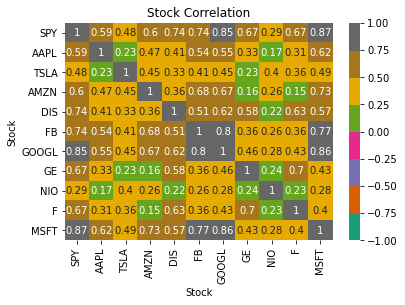

In [32]:
import seaborn as sns
stock_corr_plot = sns.heatmap(stock_corr, vmin = -1, vmax = 1, cmap = "Dark2", annot= True)
stock_corr_plot.set(
    xlabel = "Stock", 
    ylabel = "Stock",
    title = "Stock Correlation")

In [33]:
def calc_beta(df_column_1, df_column_2):
    covariance = df_column_1.cov(df_column_2)
    variance = df_column_2.var()
    beta = covariance/variance

    return beta

In [34]:
AAPL_beta = calc_beta(daily_returns['AAPL'], daily_returns['SPY'])
TSLA_beta = calc_beta(daily_returns['TSLA'], daily_returns['SPY'])
AMZN_beta = calc_beta(daily_returns['AMZN'], daily_returns['SPY'])
DIS_beta = calc_beta(daily_returns['DIS'], daily_returns['SPY'])
FB_beta = calc_beta(daily_returns['FB'], daily_returns['SPY'])
GOOGL_beta = calc_beta(daily_returns['GOOGL'], daily_returns['SPY'])
GE_beta = calc_beta(daily_returns['GE'], daily_returns['SPY'])
NIO_beta = calc_beta(daily_returns['NIO'], daily_returns['SPY'])
F_beta = calc_beta(daily_returns['F'], daily_returns['SPY'])
MSFT_beta = calc_beta(daily_returns['MSFT'], daily_returns['SPY'])

In [35]:
print(f'AAPL Beta: {AAPL_beta}')
print(f'TSLA Beta: {TSLA_beta}')
print(f'AMZN Beta: {AMZN_beta}')
print(f'DIS Beta: {DIS_beta}')
print(f'FB Beta: {FB_beta}')
print(f'GOOGL Beta: {GOOGL_beta}')
print(f'GE Beta: {GE_beta}')
print(f'NIO Beta: {NIO_beta}')
print(f'F Beta: {F_beta}')
print(f'MSFT Beta: {MSFT_beta}')

AAPL Beta: 1.15649042085368
TSLA Beta: 1.2492580679552938
AMZN Beta: 0.6821965699540022
DIS Beta: 1.0517191151946645
FB Beta: 1.003571660647894
GOOGL Beta: 0.9647934662785492
GE Beta: 1.2285361630345766
NIO Beta: 0.8680711898323109
F Beta: 1.1011825125310717
MSFT Beta: 1.1281986252654643


In [36]:
beta_list = {'Stock':["AAPL", "TSLA", "AMZN", "DIS", "FB", "GOOGL", "GE", "NIO", "F", "MSFT"], 'Beta':[AAPL_beta,
TSLA_beta,
AMZN_beta,
DIS_beta,
FB_beta,
GOOGL_beta,
GE_beta,
NIO_beta,
F_beta,
MSFT_beta]}
beta_df = pd.DataFrame(data=beta_list).set_index('Stock')
beta_df

,Beta
Stock,
AAPL,1.156490
TSLA,1.249258
AMZN,0.682197
DIS,1.051719
FB,1.003572
GOOGL,0.964793
GE,1.228536
NIO,0.868071
F,1.101183


In [37]:
corr_df = daily_returns.corr(method="pearson")
corr_df

,SPY,AAPL,TSLA,AMZN,DIS,FB,GOOGL,GE,NIO,F,MSFT
SPY,1.000000,0.586639,0.475682,0.599144,0.735761,0.738533,0.851511,0.667443,0.288370,0.666432,0.872091
AAPL,0.586639,1.000000,0.230736,0.465249,0.405759,0.541805,0.548252,0.328395,0.173462,0.313851,0.620972
TSLA,0.475682,0.230736,1.000000,0.453015,0.332914,0.405650,0.452793,0.232878,0.399648,0.359457,0.494095
AMZN,0.599144,0.465249,0.453015,1.000000,0.364405,0.678079,0.666869,0.163133,0.260724,0.147455,0.730022
DIS,0.735761,0.405759,0.332914,0.364405,1.000000,0.506438,0.616054,0.583173,0.216814,0.625710,0.570904
FB,0.738533,0.541805,0.405650,0.678079,0.506438,1.000000,0.802072,0.359084,0.259765,0.357330,0.765349
GOOGL,0.851511,0.548252,0.452793,0.666869,0.616054,0.802072,1.000000,0.460223,0.279786,0.427521,0.859424
GE,0.667443,0.328395,0.232878,0.163133,0.583173,0.359084,0.460223,1.000000,0.237861,0.699752,0.429435
NIO,0.288370,0.173462,0.399648,0.260724,0.216814,0.259765,0.279786,0.237861,1.000000,0.226690,0.276225
F,0.666432,0.313851,0.359457,0.147455,0.625710,0.357330,0.427521,0.699752,0.226690,1.000000,0.396258


In [38]:
#from sklearn.preprocessing import MinMaxScaler

In [39]:
#scaler = MinMaxScaler()

#x = big_df.values
#x_scaled = MinMaxScaler().fit_transform(x)
#big_df_2 = pd.DataFrame(x_scaled, columns=["SPY", "AAPL", "TSLA", "AMZN", "FIT", "FB", "GOOGL", "GE", "NIO", "F", "MSFT"])
#big_df_2

In [40]:
#corr_list = []

In [41]:
#def r2(x_column, y_column):
    #corr_matrix = np.corrcoef(x_column, y_column)
    #corr_xy = corr_matrix[0,1]
    #r_sq = corr_xy**2

    #return r_sq